# Homework 6

TFCB 2021

Due date: Nov 23, 2021 1PM

In this homework, we will work through a series of manipulations to analyze a published deep sequencing
dataset using `tidyverse` functions.

In the process, we will learn some new functions in `tidyverse` and apply
them to our data analysis.

For more information about the data used in this homework, see
[this page](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE89183).


In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Problem 1

**10 points**

For each of the following functions, provide a <100 character description
(in your own words) and a URL reference.

1. `!`
2. `is.na`
3. `is.numeric`
4. `anti_join`
5. `desc`
6. `dplyr::slice`
7. `dplyr::across`


1. The (!) function is the NOT operator which means that that it allows us to perform a NOT check. 
Source: https://stackoverflow.com/questions/47205389/r-exclamation-mark-before-variable-but-no-subsequent-or-similar 
2. The (is.na) function checks a dataset or list for NA values. It will print out the true values and NA for missing values
Source: https://www.programmingr.com/tutorial/is-na/ 
3. The (is.numeric) function checks if all the characters in a string are numeric or not. 
Source: https://www.geeksforgeeks.org/python-string-isnumeric-method/
4. The (anti_join) function returns all rows in one data frame that do not have matching values in another data frame 
Source: https://www.statology.org/dplyr-anti-join/
5. The (desc) function transforms a vector into a format that will be sorted into descending order 
Source: https://www.rdocumentation.org/packages/plyr/versions/1.8.7/topics/desc 
6. The (dplyr::slice) function lets you index rows by their integer locations. There are multiple extensions that allow you to easily select, remove, and duplicate rows 
Source: https://dplyr.tidyverse.org/reference/slice.html
7. The (dplyr::across) function allows yu to apply the same transformation or function to multiple columns 
Source: https://dplyr.tidyverse.org/reference/across.html 


## Problem 2

**10 points**

Add a comment above each code line below explaining what the code line does and/or why
that code line is necessary.

Keep each comment to less than 2 lines per line of code and < 80 chars per line.

In [135]:
#This line of code reads in a tsv file, saves it to an object called 'annotations'. 
annotations <- read_tsv("ftp://ftp.ebi.ac.uk/pub/databases/genenames/new/tsv/locus_groups/protein-coding_gene.txt") %>%
#It then selects the 5 specific columns listed (ensembl_gene_id, symbol, name, gene_group, ccds_id)
  select(ensembl_gene_id, symbol, name, gene_group, ccds_id) %>%
#Then it filters through to not include missing values from the ccds column
  filter(!is.na(ccds_id)) %>%
  #This tells it to print out everything form the columns above we selected that were filtered out as missing 
  print()

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 19229 Columns: 54
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (39): hgnc_id, symbol, name, locus_group, locus_type, status, location,...
dbl   (3): entrez_id, homeodb, orphanet
lgl   (8): mirbase, snornabase, imgt, kznf_gene_catalog, mamit-trnadb, lncrn...
date  (4): date_approved_reserved, date_symbol_changed, date_name_changed, d...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 18,785 × 5
   ensembl_gene_id symbol  name                               gene_group ccds_id
   <chr>           <chr>   <chr>                              <chr>      <chr>  
 1 ENSG00000121410 A1BG    alpha-1-B glycoprotein             Immunoglo… CCDS12…
 2 ENSG00000148584 A1CF    APOBEC1 complementation factor     RNA bindi… CCDS72…
 3 ENSG00000175899 A2M     alpha-2-macroglobulin              Alpha-2-m… CCDS44…
 4 ENSG00000166535 A2ML1   alpha-2-macroglobulin like 1       Alpha-2-m… CCDS85…
 5 ENSG00000184389 A3GALT2 alpha 1,3-galactosyltransferase 2  Glycosylt… CCDS60…
 6 ENSG00000128274 A4GALT  alpha 1,4-galactosyltransferase (… Alpha 1,4… CCDS14…
 7 ENSG00000118017 A4GNT   alpha-1,4-N-acetylglucosaminyltra… Alpha 1,4… CCDS30…
 8 ENSG00000094914 AAAS    aladin WD repeat nucleoporin       WD repeat… CCDS53…
 9 ENSG00000081760 AACS    acetoacetyl-CoA synthetase         Acyl-CoA … CCDS92…
10 ENSG00000114771 AADAC   arylacetamide deacetylase          Lipases|A… CCDS33…
# … w

In [123]:
#This tells it to upload a tsv file and name it a the object data
data <- read_tsv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE89nnn/GSE89183/suppl/GSE89183_Counts.txt.gz") %>%
#This tells it to go in the data object, and rename the 'ensembl_gene_id' column to 'ENSEMBL gene'
  rename(ensembl_gene_id = `ENSEMBL gene`) %>%
  #This tells it to print the new data object 
  print()

Rows: 63677 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): ENSEMBL gene
dbl (14): CD34_shTSR2_RNA_1, CD34_shTSR2_RNA_2, CD34_shRPL5_RNA_1, CD34_shRP...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 63,677 × 15
   ensembl_gene_id CD34_shTSR2_RNA_1 CD34_shTSR2_RNA_2 CD34_shRPL5_RNA_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000003                48                56                40
 2 ENSG00000000005                 0                 2                 0
 3 ENSG00000000419               880               744              1116
 4 ENSG00000000457               124               113               149
 5 ENSG00000000460               249               262               289
 6 ENSG00000000938                89                64               204
 7 ENSG00000000971               106                86               241
 8 ENSG00000001036               897               613              1487
 9 ENSG00000001084               965              1027              1036
10 ENSG00000001167               721               835               498
# … with 63,667 more rows, and 11 more variables: CD34_shRPL5_RNA_2 <dbl>,
#   CD34_shRPL5_RPF_1 <db

## Problem 3

**10 points**

Using the code below:

1. Convert both axes to `log10` instead of linear scales.
2. Show axis tick labels as 10^0^, 10^1^, 10^2^,10^3^, 10^4^, 10^5^ for both axes.
3. There are too many points overlapping in certain regions. Use a different
`geom_` function to convey to your reader how many overlapping points are present
in each region.

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 43031 rows containing non-finite values (stat_sum).”


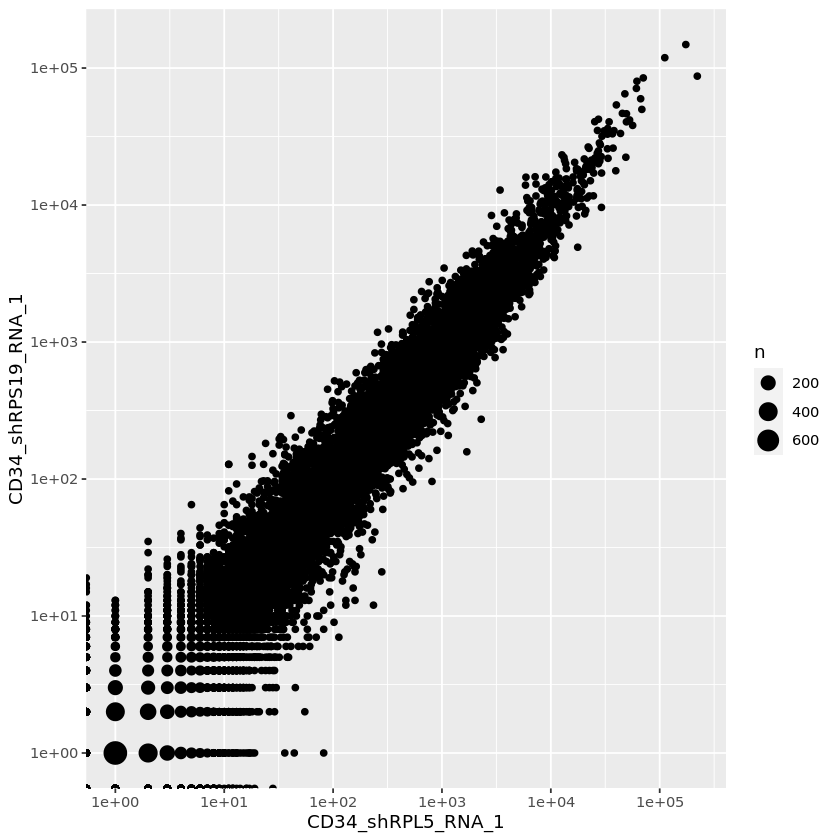

In [124]:
data %>%
  select(CD34_shRPL5_RNA_1, CD34_shRPS19_RNA_1) %>%
  ggplot(aes(x = CD34_shRPL5_RNA_1, y = CD34_shRPS19_RNA_1)) +
  geom_point() + scale_y_continuous(trans='log10', breaks=c(10^0, 10^1, 10^2, 10^3, 10^4, 10^5)) +  
  scale_x_continuous(trans='log10', breaks=c(10^0, 10^1, 10^2, 10^3, 10^4, 10^5)) + 
  geom_count()

**In problems 4 through 6, assign the result of your operation back to the `data`
variable.**

## Problem 4

**10 points**

Write a code cell to select the following columns from the `data` variable you created above and reassign back to `data`.

Columns to select: `ensembl_gene_id`, columns that have either `RPL5`, `RPS19`, or `Luc` in their name.

Instead of listing every column, use [`matches`](https://tidyselect.r-lib.org/reference/starts_with.html) and a succinct [regular expression](https://stringr.tidyverse.org/articles/regular-expressions.html) to select the above columns.

In [125]:
data <- data %>% select(contains(c("ensembl_gene_id", "RPL5", "RPS19", "Luc")))
data

ensembl_gene_id,CD34_shRPL5_RNA_1,CD34_shRPL5_RNA_2,CD34_shRPL5_RPF_1,CD34_shRPL5_RPF_2,CD34_shRPS19_RNA_1,CD34_shRPS19_RNA_2,CD34_shRPS19_RPF_1,CD34_shRPS19_RPF_2,CD34_shLuc_RNA_1,CD34_shLuc_RNA_2,CD34_shLuc_RPF_1,CD34_shLuc_RPF_2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,40,49,6,3,20,25,0,2,84,86,22,12
ENSG00000000005,0,0,0,0,1,0,0,0,3,0,0,0
ENSG00000000419,1116,1000,101,249,691,675,212,133,1030,1206,220,144
ENSG00000000457,149,126,14,22,185,225,40,20,153,128,14,17
ENSG00000000460,289,268,52,106,152,237,77,40,364,425,143,57
ENSG00000000938,204,145,17,13,412,403,31,30,8,8,0,0
ENSG00000000971,241,203,45,300,358,341,273,331,63,38,22,19
ENSG00000001036,1487,936,182,295,800,752,148,136,913,854,189,183
ENSG00000001084,1036,1224,134,275,558,817,169,95,1479,1656,220,174


## Problem 5

**10 points**

Write a code cell to filter the result from Problem 4 to include only rows where each of the 12 numerical columns you selected has 50 counts or more  and reassign back to `data`.
This is a simple way to avoid genes that have very low counts.

You might be tempted to do this step separately for each of the 12 columns, but instead use the `across` function you learned above or the `pivot_longer` function from the class (either way is fine).

In [126]:
#data %>% mutate(across(CD34_shRPL5_RNA_1:CD34_shLuc_RPF_2, filter(n() >50))
data <- data %>% filter(if_all(CD34_shRPL5_RNA_1:CD34_shLuc_RPF_2, ~. >50))


## Problem 6

**10 points**

Write a code cell to divide each of the 12 numerical columns by the
corresponding median value for each column
and reassign back to `data`. This median normalization is typically done in
high-throughput experiments after filtering
to normalize for sample-to-sample difference in read depth.

Again, you can write lot less code if you use the `mutate` and `across` function
you learned above.


In [127]:
#median(data$CD34_shRPL5_RNA_1)  #333
#median(data$CD34_shRPL5_RNA_2)
data <- data %>% mutate(across(CD34_shRPL5_RNA_1:CD34_shLuc_RPF_2, ~.x/median(.x, na.rm=TRUE)))
data

ensembl_gene_id,CD34_shRPL5_RNA_1,CD34_shRPL5_RNA_2,CD34_shRPL5_RPF_1,CD34_shRPL5_RPF_2,CD34_shRPS19_RNA_1,CD34_shRPS19_RNA_2,CD34_shRPS19_RPF_1,CD34_shRPS19_RPF_2,CD34_shLuc_RNA_1,CD34_shLuc_RNA_2,CD34_shLuc_RPF_1,CD34_shLuc_RPF_2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000419,0.8110465,0.8271299,0.6121212,0.8861210,0.6721790,0.5947137,1.0392157,0.8364780,0.7652303,0.8154158,0.8593750,0.8520710
ENSG00000001036,1.0806686,0.7741935,1.1030303,1.0498221,0.7782101,0.6625551,0.7254902,0.8553459,0.6783061,0.5774172,0.7382812,1.0828402
ENSG00000001084,0.7529070,1.0124069,0.8121212,0.9786477,0.5428016,0.7198238,0.8284314,0.5974843,1.0988113,1.1196755,0.8593750,1.0295858
ENSG00000001497,1.0436047,1.0181969,1.5333333,1.3060498,0.8608949,0.8951542,0.9558824,0.8616352,1.2236256,1.4320487,2.3203125,2.3195266
ENSG00000002549,0.8924419,0.9809760,1.7272727,1.5907473,0.6741245,0.7903084,1.2745098,1.4402516,1.1419019,1.1277890,1.7929688,1.6094675
ENSG00000002586,1.9956395,1.3234078,1.5757576,1.4056940,2.5000000,1.7524229,1.8578431,1.6226415,0.6084695,0.5483435,0.6484375,0.6627219
ENSG00000002834,3.1584302,3.1430935,1.5393939,1.4661922,5.2188716,4.5788546,2.1274510,1.7044025,2.6129272,2.8113590,1.3437500,1.4674556
ENSG00000003056,1.0021802,1.3738627,1.9454545,2.4839858,1.6040856,2.1392070,3.4705882,3.4716981,1.9502229,2.0006761,1.8867188,2.1242604
ENSG00000003393,0.6046512,0.5707196,0.5090909,0.4626335,0.9873541,1.1083700,1.0000000,1.4968553,0.8751857,0.7768763,0.3476562,0.4142012


## Problem 7

**10 points**

After we do the above filtering and median-normalization, let us calculate
translation efficiency as the average ratio of the RPF and RNA reads for each
treatment condition. Then we calculate how this translation efficiency changes
between target (`rpl5` and `rps19`) and control (`luc`) shRNAs.

The code implementing the above steps is shown below, but it has a few
errors. Correct them.


In [128]:
lfc <- data %>% mutate(mean_rp15_te = ((CD34_shRPL5_RPF_1 + CD34_shRPL5_RPF_2)/ (CD34_shRPL5_RNA_1 + CD34_shRPL5_RNA_2))) %>% 
mutate(mean_rps19_te = ((CD34_shRPS19_RPF_1 + CD34_shRPS19_RPF_2)/ (CD34_shRPS19_RNA_1 + CD34_shRPS19_RNA_2))) %>% 
mutate(mean_shluc_te = ((CD34_shLuc_RPF_1 + CD34_shLuc_RPF_2)/ (CD34_shLuc_RNA_1 + CD34_shLuc_RNA_2))) %>% 
 select(ensembl_gene_id, mean_rp15_te, mean_rps19_te, mean_shluc_te) %>%
 mutate(lfc_te_rpl5 = log2(mean_rp15_te/ mean_shluc_te),
         lfc_te_rps19 = log2(mean_rps19_te/ mean_shluc_te))

lfc


ensembl_gene_id,mean_rp15_te,mean_rps19_te,mean_shluc_te,lfc_te_rpl5,lfc_te_rps19
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000419,0.9145793,1.4805467,1.0827509,-0.24352118,0.451428602
ENSG00000001036,1.1606536,1.0972198,1.4502570,-0.32137119,-0.402456025
ENSG00000001084,1.0144195,1.1293260,0.8514636,0.25263758,0.407445199
ENSG00000001497,1.3771370,1.0350038,1.7471417,-0.34332450,-0.755360490
ENSG00000002549,1.7711052,1.8537971,1.4990746,0.24057765,0.306411092
ENSG00000002586,0.8982853,0.8184710,1.1334238,-0.33544170,-0.469684262
ENSG00000002834,0.4769618,0.3910962,0.5182628,-0.11981003,-0.406160251
ENSG00000003056,1.8642089,1.8545935,1.0152067,0.87679003,0.869329551
ENSG00000003393,0.8267386,1.1914046,0.4611555,0.84217800,1.369338299


## Problem 8

**10 points**

Write code that will create a new dataframe called `mean_lfc` from `lfc`
containing a new column called `avg_lfc`.
`avg_lfc` should be the average of the log2 fold-change in TE (`lfc_te`) upon
knockdown of RPL5 and RPS19.

Then select only the gene id column and the new column that you just created
(this will be your new dataframe `mean_lfc`).


In [162]:
#I was unsure exacty what I was supposed to take the avg of. Here I assumed we needed to take the avg of both lfc_te columns 
mean_lfc <- lfc %>% mutate(avg_lfc = rowMeans(.[,5:6])) %>% select("ensembl_gene_id", "avg_lfc")
mean_lfc 


ensembl_gene_id,avg_lfc
<chr>,<dbl>
ENSG00000000419,0.10395371
ENSG00000001036,-0.36191361
ENSG00000001084,0.33004139
ENSG00000001497,-0.54934250
ENSG00000002549,0.27349437
ENSG00000002586,-0.40256298
ENSG00000002834,-0.26298514
ENSG00000003056,0.87305979
ENSG00000003393,1.10575815



## Problem 9

**10 points**

Write code to join the `mean_lfc` dataframe with the `annotations` dataframe created
at the top of the document and assign back to `mean_lfc`.


In [163]:
mean_lfc <- merge(mean_lfc, annotations, by= 'ensembl_gene_id') 

mean_lfc

ensembl_gene_id,avg_lfc,symbol,name,gene_group,ccds_id
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
ENSG00000000419,0.10395371,DPM1,"dolichyl-phosphate mannosyltransferase subunit 1, catalytic",Glycosyltransferase family 2|Dolichyl-phosphate mannosyltransferase subunits,CCDS82628|CCDS13434
ENSG00000001036,-0.36191361,FUCA2,alpha-L-fucosidase 2,Alpha-L-fucosidases,CCDS5200
ENSG00000001084,0.33004139,GCLC,glutamate-cysteine ligase catalytic subunit,NA,CCDS75471|CCDS4952
ENSG00000001497,-0.54934250,LAS1L,LAS1 like ribosome biogenesis factor,Large ribosomal subunit biogenesis complex,CCDS55433|CCDS14381|CCDS55434
ENSG00000002549,0.27349437,LAP3,leucine aminopeptidase 3,Aminopeptidases,CCDS3422
ENSG00000002586,-0.40256298,CD99,CD99 molecule (Xg blood group),Blood group antigens|CD molecules|Pseudoautosomal region 1,CCDS83452|CCDS75947|CCDS48071|CCDS14119
ENSG00000002834,-0.26298514,LASP1,LIM and SH3 protein 1,LIM domain containing|MicroRNA protein coding host genes,CCDS11331|CCDS62164
ENSG00000003056,0.87305979,M6PR,"mannose-6-phosphate receptor, cation dependent",MRH domain containing,CCDS73440|CCDS8598
ENSG00000003393,1.10575815,ALS2,alsin Rho guanine nucleotide exchange factor ALS2,Dbl family Rho GEFs|VPS9 domain containing,CCDS46492|CCDS42800


## Problem 10

**10 points**

1. Write code to select only the bottom 10 genes with the lowest `avg_lfc` and display the gene `symbol`, gene `name` and `avg_lfc` for these genes.
2. Create a figure using `ggplot2` to visualize these results.

Write a few sentences to justify the choices you made when creating your figure.

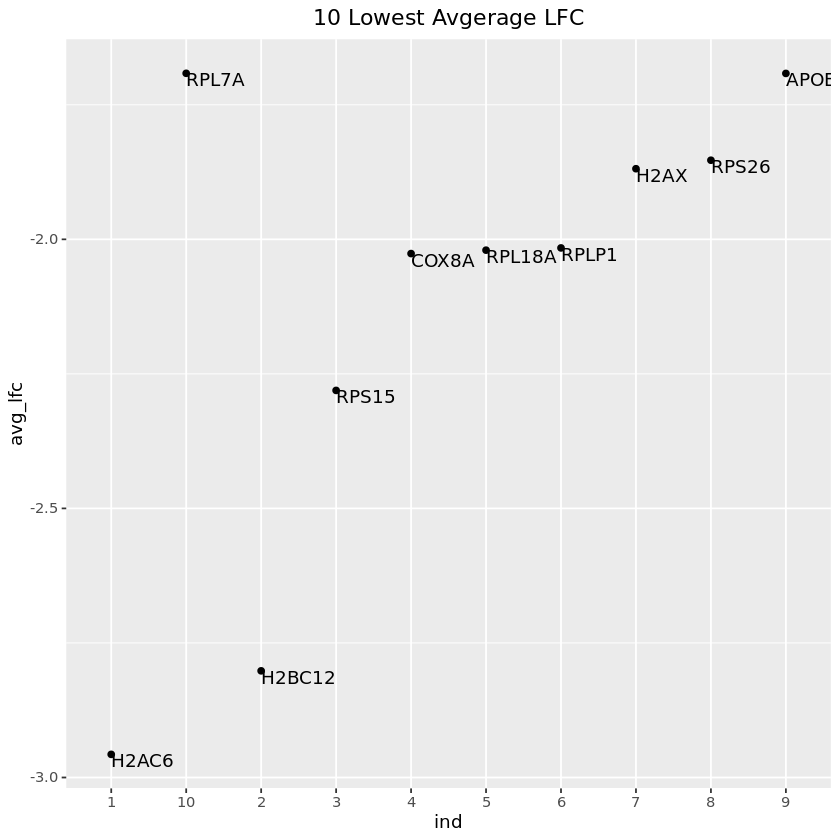

In [188]:
bottom_ten <- mean_lfc %>% arrange(-desc(avg_lfc)) %>% slice(1:10) 
bottom_ten <- bottom_ten[,2:4]



bottom_ten %>%
rownames_to_column("ind") %>%
ggplot(aes(x=ind, y=avg_lfc, label=symbol)) + geom_point() + geom_text(hjust=0, vjust=1 )+ 
labs(title= "10 Lowest Avgerage LFC") + theme(plot.title=element_text(hjust=0.5))

Since we are only working with one column of data, I chose to make a scatterplot with the avg LFC on the Y-axis and the row indices on the X-axis. However, the row indices are not scientifically meaningful, but it separates the points so you can visualize the lowest ten genes and their respective avg LFC. I then chose to add the labels to the plot. 